# Urban Sound Classification - Data Preprocessing

## Fetch Data

In [ ]:
#downloading and extracting the dataset on colab's server
import urllib.request
urllib.request.urlretrieve ("https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz","a.tar.gz")
import tarfile
tar = tarfile.open("a.tar.gz")
tar.extractall()
tar.close()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
#forming a panda dataframe from the metadata file
data=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

In [3]:
#head of the dataframe
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
#count of datapoints in each of the folders
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

## Data Visualisation

In [5]:
from librosa import display
import librosa

In [7]:
#feature set
#This file is of a dog bark
y,sr=librosa.load("UrbanSound8K/audio/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=36)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((36, 14), (36, 14), (36, 14), (36, 14), (36, 14))

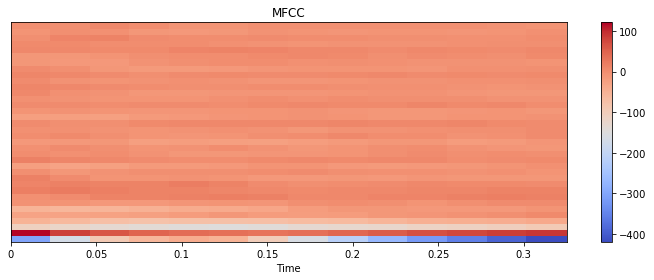

In [8]:
#MFCC of dog bark
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

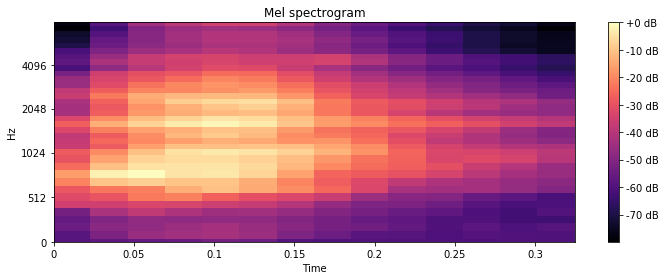

In [9]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

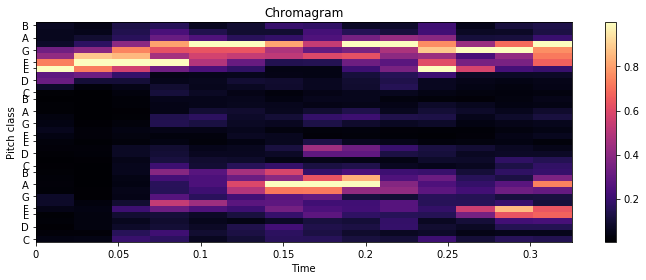

In [10]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

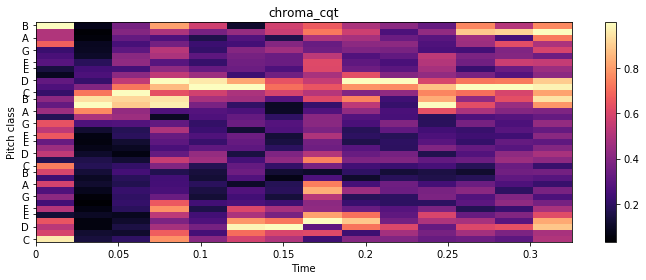

In [11]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

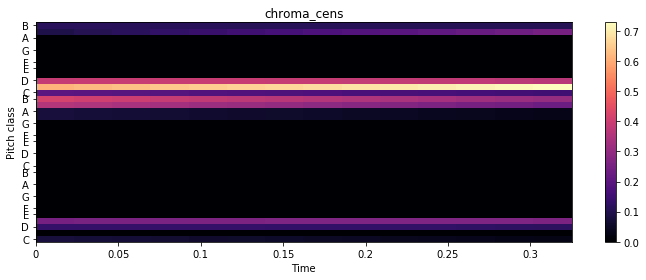

In [12]:
#Chroma cens of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

## Data Preprocessing

In [13]:
#feature set
y,sr=librosa.load("UrbanSound8K/audio/fold5/100263-2-0-137.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((36,), (36,), (36,), (36,), (36,))

In [14]:
#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
features.shape

(36, 5)

In [ ]:
#preprocessing using only mfcc
x_data=[ [] for _ in range(10) ]
y_label=[ [] for _ in range(10) ]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    x_data[int(fold_no)-1].append(mfccs)
    y_label[int(fold_no)-1].append(label)

In [ ]:
#preprocessing using entire feature set
x_data=[ [] for _ in range(10) ]
y_label=[ [] for _ in range(10) ]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
    x_data[int(fold_no)-1].append(features)
    y_label[int(fold_no)-1].append(label)

In [16]:
sum([len(x) for x in x_data])

8732

In [17]:
len(data)

8732

### Augmented Data

In [19]:
def standard_process(y, sr=22050):
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
    return features

In [20]:
# Time stretching
def time_stretching(rate, sound_clip):
    sound_clip = librosa.effects.time_stretch(sound_clip, rate = rate)
    return standard_process(sound_clip)

In [21]:
# Pitch shifting
# tone_steps = [-2, 0, 2]
def pitch_shifting(tone_step, sound_clip, sr=22050):
    sound_clip = librosa.effects.pitch_shift(sound_clip, sr, n_steps = tone_step)
    return standard_process(sound_clip)

In [22]:
# Noise Addition
def add_noise(sound_clip):
    noise = np.random.rand(len(sound_clip))
    noise = np.ones(len(sound_clip))
    noise_amp = np.random.uniform(0.005, 0.008)
    noisy_sound_clip = sound_clip + (noise_amp * noise)
    return standard_process(noisy_sound_clip)

#### Examples

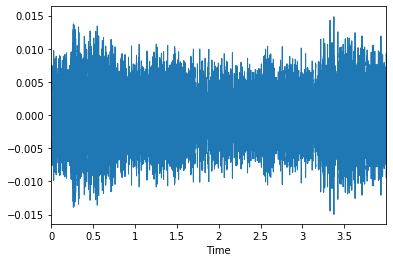

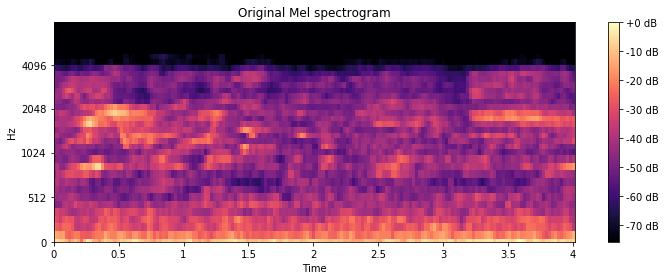

In [43]:
filename = "UrbanSound8K/audio/fold5/100263-2-0-137.wav"
y, sr = librosa.load(filename)
librosa.display.waveplot(y, sr=sr)
signal = y
melspec = librosa.feature.melspectrogram(signal, n_mels = 36)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(melspec,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Mel spectrogram')
plt.tight_layout()

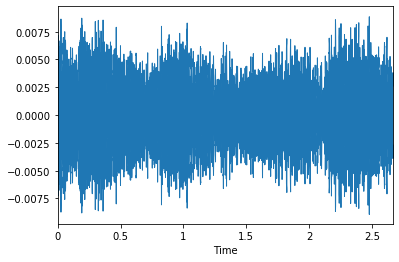

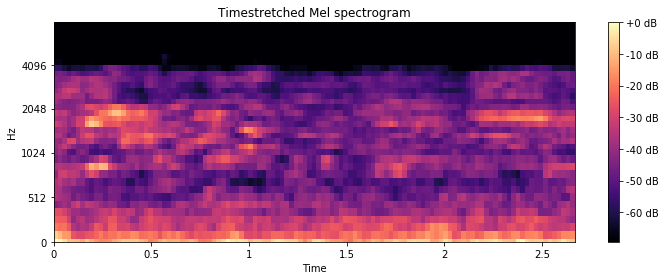

In [44]:
sound_clip = librosa.effects.time_stretch(y, rate = 1.5)
librosa.display.waveplot(sound_clip, sr=sr)
signal = sound_clip
melspec = librosa.feature.melspectrogram(signal, n_mels = 36)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(melspec,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Timestretched Mel spectrogram')
plt.tight_layout()

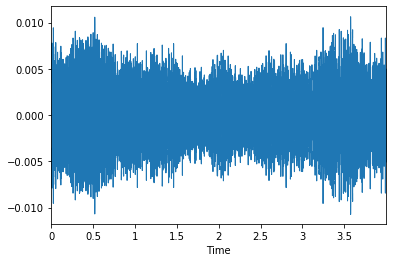

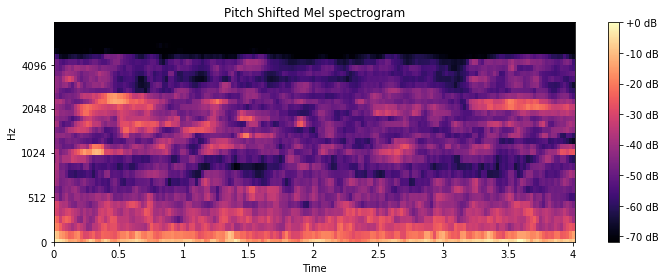

In [45]:
sound_clip = librosa.effects.pitch_shift(y, sr, n_steps = 3.5)
librosa.display.waveplot(sound_clip, sr=sr)
signal = sound_clip
melspec = librosa.feature.melspectrogram(signal, n_mels = 36)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(melspec,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Pitch Shifted Mel spectrogram')
plt.tight_layout()

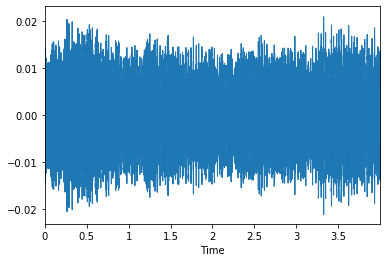

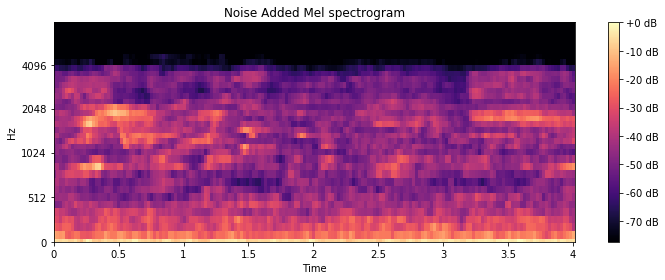

In [46]:
def get_noisy_sound(sound_clip):
    noise = np.random.rand(len(sound_clip))
    noise = np.ones(len(sound_clip))
    noise_amp = np.random.uniform(0.005, 0.008)
    noisy_sound_clip = sound_clip + (noise_amp * noise)
    return noisy_sound_clip

sound_clip = get_noisy_sound(y)
librosa.display.waveplot(sound_clip, sr=sr)
signal = sound_clip
melspec = librosa.feature.melspectrogram(signal, n_mels = 36)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(melspec,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Noise Added Mel spectrogram')
plt.tight_layout()

In [ ]:
#preprocessing using entire feature set
x_aug_data=x_data
y_aug_label=y_label
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    
    #time-stretched
    rate=1.5
    time_stretched = time_stretching(rate, y)
    x_aug_data[int(fold_no)-1].append(time_stretched)
    y_aug_label[int(fold_no)-1].append(label)

    #pitch-shifted
    tone_step=2
    pitch_shifted = pitch_shifting(tone_step, y)
    x_aug_data[int(fold_no)-1].append(pitch_shifted)
    y_aug_label[int(fold_no)-1].append(label)
    
    #noise added
    noisy_sound = add_noise(y)
    x_aug_data[int(fold_no)-1].append(noisy_sound)
    y_aug_label[int(fold_no)-1].append(label)

## Store Processed Data

In [37]:
import pickle as pkl

with open("x_data.pickle","wb") as f:
    pkl.dump(x_data, f)

with open("y_label.pickle","wb") as f:
    pkl.dump(y_label, f)

In [40]:
with open("x_aug_data.pickle","wb") as f:
    pkl.dump(x_aug_data, f)

with open("y_aug_label.pickle","wb") as f:
    pkl.dump(y_aug_label, f)